# Importing libraries and datasets

In [1]:
#basic libraries
import pandas as pd
import numpy as np
import math

#visualisation
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
import missingno as msno
from plotly.figure_factory import create_scatterplotmatrix
from wordcloud import WordCloud
sns.set()

# Ignore warnings :
import warnings
warnings.filterwarnings('ignore')

# import required libraries for ML
import sklearn

#feature eng
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce

#Classification
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

In [2]:
#datasets sales
sales = pd.read_csv("C:/Users/linco/Desktop/datastudy/DScourse/FinalProject/sales.csv")

In [3]:
#dataset customers
customers = pd.read_csv("C:/Users/linco/Desktop/datastudy/DScourse/FinalProject/customers.csv")

In [4]:
cust_scaled = pd.read_csv("C:/Users/linco/Desktop/datastudy/DScourse/FinalProject/customers_scaled.csv")

## Checking the datasets

In [5]:
sales.head()

,Unnamed: 0,OrderDate,StockDate,OrderNumber,ProductKey,ProductCategoryKey,CategoryName,ProductSubcategoryKey,SubcategoryName,ProductCost,...,Region,Country,Continent,OrderLineItem,OrderQuantity,OrderValue,OrderProfit,year,month,week
0,0,2015-01-01,9/21/2001,SO45080,332,1,Bikes,2,Road Bikes,413.1463,...,Northwest,United States,North America,1,1,699.0982,285.9519,2015,1,1
1,1,2015-01-01,12/5/2001,SO45079,312,1,Bikes,2,Road Bikes,2171.2942,...,Southwest,United States,North America,1,1,3578.2700,1406.9758,2015,1,1
2,2,2015-01-01,10/29/2001,SO45082,350,1,Bikes,1,Mountain Bikes,1898.0944,...,Australia,Australia,Pacific,1,1,3374.9900,1476.8956,2015,1,1
3,3,2015-01-01,11/16/2001,SO45081,338,1,Bikes,2,Road Bikes,413.1463,...,Canada,Canada,North America,1,1,699.0982,285.9519,2015,1,1
4,4,2015-01-02,12/15/2001,SO45083,312,1,Bikes,2,Road Bikes,2171.2942,...,United Kingdom,United Kingdom,Europe,1,1,3578.2700,1406.9758,2015,1,1


In [6]:
sales.drop(["Unnamed: 0"], axis=1, inplace=True)
sales.head()

,OrderDate,StockDate,OrderNumber,ProductKey,ProductCategoryKey,CategoryName,ProductSubcategoryKey,SubcategoryName,ProductCost,ProductPrice,...,Region,Country,Continent,OrderLineItem,OrderQuantity,OrderValue,OrderProfit,year,month,week
0,2015-01-01,9/21/2001,SO45080,332,1,Bikes,2,Road Bikes,413.1463,699.0982,...,Northwest,United States,North America,1,1,699.0982,285.9519,2015,1,1
1,2015-01-01,12/5/2001,SO45079,312,1,Bikes,2,Road Bikes,2171.2942,3578.2700,...,Southwest,United States,North America,1,1,3578.2700,1406.9758,2015,1,1
2,2015-01-01,10/29/2001,SO45082,350,1,Bikes,1,Mountain Bikes,1898.0944,3374.9900,...,Australia,Australia,Pacific,1,1,3374.9900,1476.8956,2015,1,1
3,2015-01-01,11/16/2001,SO45081,338,1,Bikes,2,Road Bikes,413.1463,699.0982,...,Canada,Canada,North America,1,1,699.0982,285.9519,2015,1,1
4,2015-01-02,12/15/2001,SO45083,312,1,Bikes,2,Road Bikes,2171.2942,3578.2700,...,United Kingdom,United Kingdom,Europe,1,1,3578.2700,1406.9758,2015,1,1


In [7]:
sales.isna().sum()

OrderDate                0
StockDate                0
OrderNumber              0
ProductKey               0
ProductCategoryKey       0
CategoryName             0
ProductSubcategoryKey    0
SubcategoryName          0
ProductCost              0
ProductPrice             0
CustomerKey              0
TerritoryKey             0
Region                   0
Country                  0
Continent                0
OrderLineItem            0
OrderQuantity            0
OrderValue               0
OrderProfit              0
year                     0
month                    0
week                     0
dtype: int64

In [8]:
sales.duplicated().sum()

0

In [9]:
#check customers df
customers.head()

,Unnamed: 0,index,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,...,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age
0,0,0,11000,Jon,Yang,3761 N. 14th St,Rockhampton,Queensland,Australia,4700,...,Bachelors,Professional,M,M,1,0,0,2,137947,51.0
1,1,1,11001,Eugene,Huang,2243 W St.,Seaford,Victoria,Australia,3198,...,Bachelors,Professional,M,S,0,1,3,3,101141,52.0
2,2,2,11002,Ruben,Torres,5844 Linden Land,Hobart,Tasmania,Australia,7001,...,Bachelors,Professional,M,M,1,1,3,3,91945,51.0
3,3,3,11003,Christy,Zhu,1825 Village Pl.,North Ryde,New South Wales,Australia,2113,...,Bachelors,Professional,F,S,0,1,0,0,86688,49.0
4,4,4,11004,Elizabeth,Johnson,7553 Harness Circle,Wollongong,New South Wales,Australia,2500,...,Bachelors,Professional,F,S,1,4,5,5,92771,48.0


In [10]:
customers.drop(['Unnamed: 0', 'index'], axis=1, inplace=True)
customers.head()

,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age
0,11000,Jon,Yang,3761 N. 14th St,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947,51.0
1,11001,Eugene,Huang,2243 W St.,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141,52.0
2,11002,Ruben,Torres,5844 Linden Land,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945,51.0
3,11003,Christy,Zhu,1825 Village Pl.,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688,49.0
4,11004,Elizabeth,Johnson,7553 Harness Circle,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771,48.0


In [11]:
customers.isna().sum()

CustomerID              0
FirstName               0
LastName                0
AddressLine1            0
City                    0
StateProvinceName       0
CountryRegionName       0
PostalCode              0
PhoneNumber             0
BirthDate               0
Education               0
Occupation              0
Gender                  0
MaritalStatus           0
HomeOwnerFlag           0
NumberCarsOwned         0
NumberChildrenAtHome    0
TotalChildren           0
YearlyIncome            0
Age                     0
dtype: int64

In [12]:
customers.duplicated().sum()

0

In [13]:
#checking scaled df
cust_scaled.head()

,Unnamed: 0,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,Country_Australia,Country_Canada,Country_France,Country_Germany,Country_United Kingdom,Country_United States,Age,YearlyIncome,CustomerID
0,0,4,4,0,0,1,0,0,2,1,0,0,0,0,0,0.306122,0.686872,11000
1,1,4,4,0,1,0,1,3,3,1,0,0,0,0,0,0.326531,0.490079,11001
2,2,4,4,0,0,1,1,3,3,1,0,0,0,0,0,0.306122,0.440910,11002
3,3,4,4,1,1,0,1,0,0,1,0,0,0,0,0,0.265306,0.412802,11003
4,4,4,4,1,1,1,4,5,5,1,0,0,0,0,0,0.244898,0.445327,11004


In [14]:
cust_scaled.drop(['Unnamed: 0'],axis=1,inplace=True)
cust_scaled.head()

,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,Country_Australia,Country_Canada,Country_France,Country_Germany,Country_United Kingdom,Country_United States,Age,YearlyIncome,CustomerID
0,4,4,0,0,1,0,0,2,1,0,0,0,0,0,0.306122,0.686872,11000
1,4,4,0,1,0,1,3,3,1,0,0,0,0,0,0.326531,0.490079,11001
2,4,4,0,0,1,1,3,3,1,0,0,0,0,0,0.306122,0.440910,11002
3,4,4,1,1,0,1,0,0,1,0,0,0,0,0,0.265306,0.412802,11003
4,4,4,1,1,1,4,5,5,1,0,0,0,0,0,0.244898,0.445327,11004


In [15]:
cust_scaled.isna().sum()

Education                 0
Occupation                0
Gender                    0
MaritalStatus             0
HomeOwnerFlag             0
NumberCarsOwned           0
NumberChildrenAtHome      0
TotalChildren             0
Country_Australia         0
Country_Canada            0
Country_France            0
Country_Germany           0
Country_United Kingdom    0
Country_United States     0
Age                       0
YearlyIncome              0
CustomerID                0
dtype: int64

In [16]:
cust_scaled.duplicated().sum()

0

# Data Prep

## Select relevant features

In [17]:
sales.columns

Index(['OrderDate', 'StockDate', 'OrderNumber', 'ProductKey',
       'ProductCategoryKey', 'CategoryName', 'ProductSubcategoryKey',
       'SubcategoryName', 'ProductCost', 'ProductPrice', 'CustomerKey',
       'TerritoryKey', 'Region', 'Country', 'Continent', 'OrderLineItem',
       'OrderQuantity', 'OrderValue', 'OrderProfit', 'year', 'month', 'week'],
      dtype='object')

In [18]:
data = sales[['OrderDate','OrderNumber', 'ProductKey', 'OrderQuantity', 'ProductPrice', 'OrderValue','CustomerKey']]

In [19]:
data

,OrderDate,OrderNumber,ProductKey,OrderQuantity,ProductPrice,OrderValue,CustomerKey
0,2015-01-01,SO45080,332,1,699.0982,699.0982,14657
1,2015-01-01,SO45079,312,1,3578.2700,3578.2700,29255
2,2015-01-01,SO45082,350,1,3374.9900,3374.9900,11455
3,2015-01-01,SO45081,338,1,699.0982,699.0982,26782
4,2015-01-02,SO45083,312,1,3578.2700,3578.2700,14947
...,...,...,...,...,...,...,...
56041,2017-06-30,SO74143,477,2,4.9900,9.9800,28517
56042,2017-06-30,SO74143,479,1,8.9900,8.9900,28517
56043,2017-06-30,SO74143,606,1,539.9900,539.9900,28517
56044,2017-06-30,SO74124,480,2,2.2900,4.5800,21676


## Split the timeline

In [20]:
# check if it's datatime
data["OrderDate"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 56046 entries, 0 to 56045
Series name: OrderDate
Non-Null Count  Dtype 
--------------  ----- 
56046 non-null  object
dtypes: object(1)
memory usage: 438.0+ KB


In [21]:
# converting to datetime
data["OrderDate"] = pd.to_datetime(data["OrderDate"])

In [22]:
# checking
data["OrderDate"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 56046 entries, 0 to 56045
Series name: OrderDate
Non-Null Count  Dtype         
--------------  -----         
56046 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 438.0 KB


In [23]:
# checking lenght of sales info 
print("start date: ", data["OrderDate"].min())
print("end date: ", data["OrderDate"].max())

start date:  2015-01-01 00:00:00
end date:  2017-06-30 00:00:00


In [24]:
data.shape

(56046, 7)

In [25]:
data_start = data[data["OrderDate"] < "2017-03-30"]
data_start.reset_index(drop=True)
data_start

,OrderDate,OrderNumber,ProductKey,OrderQuantity,ProductPrice,OrderValue,CustomerKey
0,2015-01-01,SO45080,332,1,699.0982,699.0982,14657
1,2015-01-01,SO45079,312,1,3578.2700,3578.2700,29255
2,2015-01-01,SO45082,350,1,3374.9900,3374.9900,11455
3,2015-01-01,SO45081,338,1,699.0982,699.0982,26782
4,2015-01-02,SO45083,312,1,3578.2700,3578.2700,14947
...,...,...,...,...,...,...,...
39921,2017-03-29,SO67120,529,2,3.9900,7.9800,24156
39922,2017-03-29,SO67138,220,1,33.6442,33.6442,24197
39923,2017-03-29,SO67138,389,1,1000.4375,1000.4375,24197
39924,2017-03-29,SO67132,383,1,1000.4375,1000.4375,25960


In [26]:
data_next = data[data["OrderDate"] >= "2017-03-30"]
data_next.reset_index(drop=True)
data_next

,OrderDate,OrderNumber,ProductKey,OrderQuantity,ProductPrice,OrderValue,CustomerKey
39926,2017-03-30,SO67195,214,1,34.9900,34.9900,23846
39927,2017-03-30,SO67195,560,1,1214.8500,1214.8500,23846
39928,2017-03-30,SO67149,539,2,24.9900,49.9800,15605
39929,2017-03-30,SO67162,478,3,9.9900,29.9700,20738
39930,2017-03-30,SO67162,223,2,8.6442,17.2884,20738
...,...,...,...,...,...,...,...
56041,2017-06-30,SO74143,477,2,4.9900,9.9800,28517
56042,2017-06-30,SO74143,479,1,8.9900,8.9900,28517
56043,2017-06-30,SO74143,606,1,539.9900,539.9900,28517
56044,2017-06-30,SO74124,480,2,2.2900,4.5800,21676


# Next purchase day 

In [27]:
nextpurchase = data_next.groupby("CustomerKey")["OrderDate"].min().reset_index()
nextpurchase

,CustomerKey,OrderDate
0,11001,2017-06-12
1,11012,2017-04-17
2,11017,2017-04-16
3,11018,2017-04-26
4,11019,2017-04-19
...,...,...
6026,29462,2017-04-02
6027,29463,2017-04-11
6028,29464,2017-04-17
6029,29465,2017-04-22


In [28]:
nextpurchase.columns = ["CustomerKey", "NextPurchase"]
nextpurchase.head()

,CustomerKey,NextPurchase
0,11001,2017-06-12
1,11012,2017-04-17
2,11017,2017-04-16
3,11018,2017-04-26
4,11019,2017-04-19


In [29]:
lastpurchase = data_start.groupby("CustomerKey")["OrderDate"].max().reset_index()
lastpurchase

,CustomerKey,OrderDate
0,11000,2016-11-04
1,11001,2016-07-20
2,11002,2016-08-27
3,11003,2016-11-11
4,11004,2016-11-02
...,...,...
13753,29479,2016-03-08
13754,29480,2017-01-18
13755,29481,2015-02-13
13756,29482,2016-03-22


In [30]:
lastpurchase.columns = ["CustomerKey", "LastPurchase"]
lastpurchase.head()

,CustomerKey,LastPurchase
0,11000,2016-11-04
1,11001,2016-07-20
2,11002,2016-08-27
3,11003,2016-11-11
4,11004,2016-11-02


In [31]:
purchase_dates = pd.merge(lastpurchase, nextpurchase, on="CustomerKey", how="left")
purchase_dates

,CustomerKey,LastPurchase,NextPurchase
0,11000,2016-11-04,NaT
1,11001,2016-07-20,2017-06-12
2,11002,2016-08-27,NaT
3,11003,2016-11-11,NaT
4,11004,2016-11-02,NaT
...,...,...,...
13753,29479,2016-03-08,NaT
13754,29480,2017-01-18,NaT
13755,29481,2015-02-13,NaT
13756,29482,2016-03-22,NaT


In [32]:
purchase_dates["NextPurchase"].value_counts()

2017-05-01    40
2017-04-03    39
2017-04-27    36
2017-06-06    35
2017-06-11    34
              ..
2017-06-16    16
2017-06-12    16
2017-05-27    15
2017-06-01    12
2017-05-18    11
Name: NextPurchase, Length: 93, dtype: int64

In [33]:
purchase_dates["NextPurchase"].isnull().sum()

11385

In [34]:
next_start = data_next["OrderDate"].min()

In [35]:
purchase_dates["DaysToNextPurchase"] = purchase_dates["NextPurchase"] - next_start
purchase_dates.head()

,CustomerKey,LastPurchase,NextPurchase,DaysToNextPurchase
0,11000,2016-11-04,NaT,NaT
1,11001,2016-07-20,2017-06-12,74 days
2,11002,2016-08-27,NaT,NaT
3,11003,2016-11-11,NaT,NaT
4,11004,2016-11-02,NaT,NaT


In [36]:
purchase_dates["DaysToNextPurchase"] = purchase_dates["DaysToNextPurchase"].dt.days
purchase_dates.head()

,CustomerKey,LastPurchase,NextPurchase,DaysToNextPurchase
0,11000,2016-11-04,NaT,NaN
1,11001,2016-07-20,2017-06-12,74.0
2,11002,2016-08-27,NaT,NaN
3,11003,2016-11-11,NaT,NaN
4,11004,2016-11-02,NaT,NaN


In [37]:
purchase_dates["DaysToNextPurchase"] = purchase_dates["DaysToNextPurchase"].fillna(999)
purchase_dates.head()

,CustomerKey,LastPurchase,NextPurchase,DaysToNextPurchase
0,11000,2016-11-04,NaT,999.0
1,11001,2016-07-20,2017-06-12,74.0
2,11002,2016-08-27,NaT,999.0
3,11003,2016-11-11,NaT,999.0
4,11004,2016-11-02,NaT,999.0


## Next Purchase Class

<AxesSubplot:xlabel='DaysToNextPurchase', ylabel='Count'>

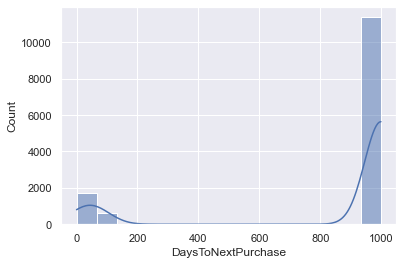

In [38]:
sns.histplot(purchase_dates["DaysToNextPurchase"], kde=True)

In [39]:
purchase_dates["DaysToNextPurchase"].value_counts()

999.0    11385
32.0        40
4.0         39
28.0        36
68.0        35
         ...  
78.0        16
74.0        16
58.0        15
63.0        12
49.0        11
Name: DaysToNextPurchase, Length: 94, dtype: int64

In [40]:
#create next purchase classes

purchase_dates["NextPurchaseClass"] = 2
purchase_dates.loc[purchase_dates["DaysToNextPurchase"]>30, "NextPurchaseClass"] = 1
purchase_dates.loc[purchase_dates["DaysToNextPurchase"]>90, "NextPurchaseClass"] = 0

In [41]:
purchase_dates

,CustomerKey,LastPurchase,NextPurchase,DaysToNextPurchase,NextPurchaseClass
0,11000,2016-11-04,NaT,999.0,0
1,11001,2016-07-20,2017-06-12,74.0,1
2,11002,2016-08-27,NaT,999.0,0
3,11003,2016-11-11,NaT,999.0,0
4,11004,2016-11-02,NaT,999.0,0
...,...,...,...,...,...
13753,29479,2016-03-08,NaT,999.0,0
13754,29480,2017-01-18,NaT,999.0,0
13755,29481,2015-02-13,NaT,999.0,0
13756,29482,2016-03-22,NaT,999.0,0


In [42]:
purchase_dates["NextPurchaseClass"].value_counts()

0    11432
1     1482
2      844
Name: NextPurchaseClass, dtype: int64

## RFM on train data

### Recency

In [43]:
data_start

,OrderDate,OrderNumber,ProductKey,OrderQuantity,ProductPrice,OrderValue,CustomerKey
0,2015-01-01,SO45080,332,1,699.0982,699.0982,14657
1,2015-01-01,SO45079,312,1,3578.2700,3578.2700,29255
2,2015-01-01,SO45082,350,1,3374.9900,3374.9900,11455
3,2015-01-01,SO45081,338,1,699.0982,699.0982,26782
4,2015-01-02,SO45083,312,1,3578.2700,3578.2700,14947
...,...,...,...,...,...,...,...
39921,2017-03-29,SO67120,529,2,3.9900,7.9800,24156
39922,2017-03-29,SO67138,220,1,33.6442,33.6442,24197
39923,2017-03-29,SO67138,389,1,1000.4375,1000.4375,24197
39924,2017-03-29,SO67132,383,1,1000.4375,1000.4375,25960


In [44]:
end_date = data_start["OrderDate"].max()

In [45]:
end_date

Timestamp('2017-03-29 00:00:00')

In [46]:
data_start["difference"] = end_date - data_start["OrderDate"]
data_start

,OrderDate,OrderNumber,ProductKey,OrderQuantity,ProductPrice,OrderValue,CustomerKey,difference
0,2015-01-01,SO45080,332,1,699.0982,699.0982,14657,818 days
1,2015-01-01,SO45079,312,1,3578.2700,3578.2700,29255,818 days
2,2015-01-01,SO45082,350,1,3374.9900,3374.9900,11455,818 days
3,2015-01-01,SO45081,338,1,699.0982,699.0982,26782,818 days
4,2015-01-02,SO45083,312,1,3578.2700,3578.2700,14947,817 days
...,...,...,...,...,...,...,...,...
39921,2017-03-29,SO67120,529,2,3.9900,7.9800,24156,0 days
39922,2017-03-29,SO67138,220,1,33.6442,33.6442,24197,0 days
39923,2017-03-29,SO67138,389,1,1000.4375,1000.4375,24197,0 days
39924,2017-03-29,SO67132,383,1,1000.4375,1000.4375,25960,0 days


In [47]:
data_start["difference"] = data_start["difference"].dt.days
data_start.head()

,OrderDate,OrderNumber,ProductKey,OrderQuantity,ProductPrice,OrderValue,CustomerKey,difference
0,2015-01-01,SO45080,332,1,699.0982,699.0982,14657,818
1,2015-01-01,SO45079,312,1,3578.2700,3578.2700,29255,818
2,2015-01-01,SO45082,350,1,3374.9900,3374.9900,11455,818
3,2015-01-01,SO45081,338,1,699.0982,699.0982,26782,818
4,2015-01-02,SO45083,312,1,3578.2700,3578.2700,14947,817


In [48]:
RFMrec = data_start.groupby("CustomerKey")["difference"].min()
RFMrec

CustomerKey
11000    145
11001    252
11002    214
11003    138
11004    147
        ... 
29479    386
29480     70
29481    775
29482    372
29483    381
Name: difference, Length: 13758, dtype: int64

In [49]:
RFMrec.sort_values(ascending=True, inplace=True)
RFMrec = RFMrec.reset_index()
RFMrec.head()

,CustomerKey,difference
0,19126,0
1,16598,0
2,12028,0
3,17971,0
4,13116,0


In [50]:
RFMrec.rename(columns={"difference":"Recency"}, inplace=True)
RFMrec

,CustomerKey,Recency
0,19126,0
1,16598,0
2,12028,0
3,17971,0
4,13116,0
...,...,...
13753,29151,815
13754,25977,816
13755,29170,816
13756,29143,817


### Frequency

In [51]:
RFMfreq = data_start.groupby("CustomerKey")["OrderNumber"].count()
RFMfreq

CustomerKey
11000    7
11001    6
11002    3
11003    8
11004    5
        ..
29479    1
29480    5
29481    1
29482    1
29483    1
Name: OrderNumber, Length: 13758, dtype: int64

In [52]:
RFMfreq = RFMfreq.reset_index()
RFMfreq.rename(columns={"OrderNumber":"Frequency"}, inplace=True)
RFMfreq

,CustomerKey,Frequency
0,11000,7
1,11001,6
2,11002,3
3,11003,8
4,11004,5
...,...,...
13753,29479,1
13754,29480,5
13755,29481,1
13756,29482,1


### Monetary

In [53]:
RFMmon = data_start.groupby("CustomerKey")["OrderValue"].sum()
RFMmon = RFMmon.reset_index()
RFMmon["OrderValue"] = round(RFMmon["OrderValue"],2)
RFMmon.rename(columns={"OrderValue":"Monetary"}, inplace=True)
RFMmon

,CustomerKey,Monetary
0,11000,4656.39
1,11001,2228.61
2,11002,4466.81
3,11003,4532.99
4,11004,4568.08
...,...,...
13753,29479,2049.10
13754,29480,2471.61
13755,29481,3374.99
13756,29482,2049.10


### RFM df

In [54]:
RFM = pd.merge(RFMrec, RFMfreq, on="CustomerKey", how="outer")
RFM

,CustomerKey,Recency,Frequency
0,19126,0,1
1,16598,0,4
2,12028,0,2
3,17971,0,2
4,13116,0,5
...,...,...,...
13753,29151,815,1
13754,25977,816,1
13755,29170,816,1
13756,29143,817,1


In [55]:
RFM = pd.merge(RFM, RFMmon, on="CustomerKey", how="outer")
RFM

,CustomerKey,Recency,Frequency,Monetary
0,19126,0,1,69.99
1,16598,0,4,6894.50
2,12028,0,2,44.98
3,17971,0,2,1734.63
4,13116,0,5,81.52
...,...,...,...,...
13753,29151,815,1,3578.27
13754,25977,816,1,3374.99
13755,29170,816,1,3578.27
13756,29143,817,1,3578.27


In [56]:
#check merge went ok
RFM.isnull().sum()

CustomerKey    0
Recency        0
Frequency      0
Monetary       0
dtype: int64

In [57]:
RFM.set_index("CustomerKey", inplace=True)

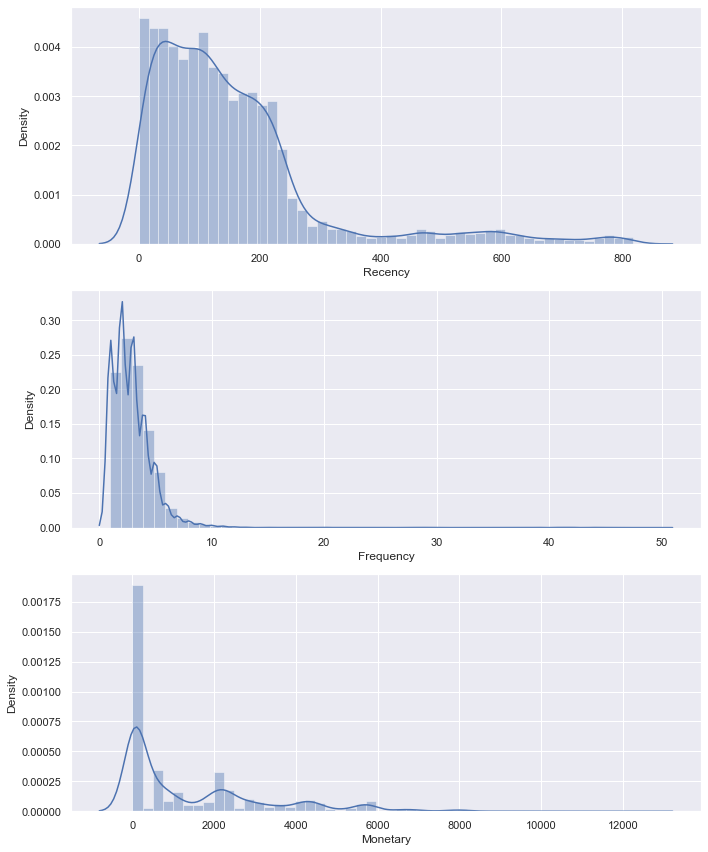

In [58]:
# plot the distribution of RFM values
plt.subplots(figsize=(10, 12))

plt.subplot(3, 1, 1)
sns.distplot(RFM.Recency, label = 'Recency')

plt.subplot(3, 1, 2)
sns.distplot(RFM.Frequency, label = 'Frequency')

plt.subplot(3, 1, 3)
sns.distplot(RFM.Monetary, label = 'Monetary Value')

plt.tight_layout()
plt.show()

# Average between orders

In [59]:
data_start

,OrderDate,OrderNumber,ProductKey,OrderQuantity,ProductPrice,OrderValue,CustomerKey,difference
0,2015-01-01,SO45080,332,1,699.0982,699.0982,14657,818
1,2015-01-01,SO45079,312,1,3578.2700,3578.2700,29255,818
2,2015-01-01,SO45082,350,1,3374.9900,3374.9900,11455,818
3,2015-01-01,SO45081,338,1,699.0982,699.0982,26782,818
4,2015-01-02,SO45083,312,1,3578.2700,3578.2700,14947,817
...,...,...,...,...,...,...,...,...
39921,2017-03-29,SO67120,529,2,3.9900,7.9800,24156,0
39922,2017-03-29,SO67138,220,1,33.6442,33.6442,24197,0
39923,2017-03-29,SO67138,389,1,1000.4375,1000.4375,24197,0
39924,2017-03-29,SO67132,383,1,1000.4375,1000.4375,25960,0


In [60]:
date_cust = data_start[["OrderDate","CustomerKey"]]
date_cust

,OrderDate,CustomerKey
0,2015-01-01,14657
1,2015-01-01,29255
2,2015-01-01,11455
3,2015-01-01,26782
4,2015-01-02,14947
...,...,...
39921,2017-03-29,24156
39922,2017-03-29,24197
39923,2017-03-29,24197
39924,2017-03-29,25960


In [61]:
date_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39926 entries, 0 to 39925
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   OrderDate    39926 non-null  datetime64[ns]
 1   CustomerKey  39926 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 935.8 KB


In [62]:
# making sure it is ordered by date

date_cust.sort_values(by="OrderDate")

,OrderDate,CustomerKey
0,2015-01-01,14657
1,2015-01-01,29255
2,2015-01-01,11455
3,2015-01-01,26782
4,2015-01-02,14947
...,...,...
39835,2017-03-29,23671
39836,2017-03-29,23671
39837,2017-03-29,17103
39831,2017-03-29,13951


In [63]:
#check duplicates

date_cust.duplicated().sum()

21216

In [64]:
#drop duplicates

date_cust.drop_duplicates(keep="first", inplace=True)

In [65]:
date_cust.duplicated().sum()

0

In [66]:
date_cust.shape

(18710, 2)

In [67]:
#getting the last 3 order dates

date_cust["LastOrder"] = date_cust.groupby("CustomerKey")["OrderDate"].shift(1)
date_cust["2ndLastOrder"] = date_cust.groupby("CustomerKey")["OrderDate"].shift(2)
date_cust["3rdLastOrder"] = date_cust.groupby("CustomerKey")["OrderDate"].shift(3)
date_cust

,OrderDate,CustomerKey,LastOrder,2ndLastOrder,3rdLastOrder
0,2015-01-01,14657,NaT,NaT,NaT
1,2015-01-01,29255,NaT,NaT,NaT
2,2015-01-01,11455,NaT,NaT,NaT
3,2015-01-01,26782,NaT,NaT,NaT
4,2015-01-02,14947,NaT,NaT,NaT
...,...,...,...,...,...
39917,2017-03-29,27724,NaT,NaT,NaT
39918,2017-03-29,13116,2016-09-15,NaT,NaT
39920,2017-03-29,24156,NaT,NaT,NaT
39922,2017-03-29,24197,NaT,NaT,NaT


In [68]:
# getting days to last orders

date_cust["DaysToLastOrder"] = (date_cust["OrderDate"] - date_cust["LastOrder"]).dt.days
date_cust["DaysTo2ndLastOrder"] = (date_cust["OrderDate"] - date_cust["LastOrder"]).dt.days
date_cust["DaysTo3rdLastOrder"] = (date_cust["OrderDate"] - date_cust["2ndLastOrder"]).dt.days
date_cust

,OrderDate,CustomerKey,LastOrder,2ndLastOrder,3rdLastOrder,DaysToLastOrder,DaysTo2ndLastOrder,DaysTo3rdLastOrder
0,2015-01-01,14657,NaT,NaT,NaT,NaN,NaN,NaN
1,2015-01-01,29255,NaT,NaT,NaT,NaN,NaN,NaN
2,2015-01-01,11455,NaT,NaT,NaT,NaN,NaN,NaN
3,2015-01-01,26782,NaT,NaT,NaT,NaN,NaN,NaN
4,2015-01-02,14947,NaT,NaT,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
39917,2017-03-29,27724,NaT,NaT,NaT,NaN,NaN,NaN
39918,2017-03-29,13116,2016-09-15,NaT,NaT,195.0,195.0,NaN
39920,2017-03-29,24156,NaT,NaT,NaT,NaN,NaN,NaN
39922,2017-03-29,24197,NaT,NaT,NaT,NaN,NaN,NaN


In [69]:
date_cust[date_cust["DaysTo3rdLastOrder"] >1]

,OrderDate,CustomerKey,LastOrder,2ndLastOrder,3rdLastOrder,DaysToLastOrder,DaysTo2ndLastOrder,DaysTo3rdLastOrder
5479,2016-07-26,11439,2016-07-11,2016-06-02,NaT,15.0,15.0,54.0
6990,2016-08-12,11212,2016-08-09,2016-08-03,NaT,3.0,3.0,9.0
7346,2016-08-14,11176,2016-08-13,2016-08-06,NaT,1.0,1.0,8.0
7695,2016-08-17,11176,2016-08-14,2016-08-13,2016-08-06,3.0,3.0,4.0
8299,2016-08-23,11212,2016-08-12,2016-08-09,2016-08-03,11.0,11.0,14.0
...,...,...,...,...,...,...,...,...
39856,2017-03-29,11824,2017-01-26,2016-09-19,NaT,62.0,62.0,191.0
39868,2017-03-29,13628,2017-03-01,2016-10-03,NaT,28.0,28.0,177.0
39870,2017-03-29,16598,2017-02-23,2015-11-24,NaT,34.0,34.0,491.0
39873,2017-03-29,14230,2017-03-14,2016-03-09,NaT,15.0,15.0,385.0


In [70]:
date_cust[date_cust["CustomerKey"] == 12295]

,OrderDate,CustomerKey,LastOrder,2ndLastOrder,3rdLastOrder,DaysToLastOrder,DaysTo2ndLastOrder,DaysTo3rdLastOrder
7519,2016-08-16,12295,NaT,NaT,NaT,NaN,NaN,NaN
17100,2016-10-30,12295,2016-08-16,NaT,NaT,75.0,75.0,NaN
33950,2017-02-19,12295,2016-10-30,2016-08-16,NaT,112.0,112.0,187.0
39828,2017-03-29,12295,2017-02-19,2016-10-30,2016-08-16,38.0,38.0,150.0


In [71]:
last_order = date_cust.groupby("CustomerKey")["DaysToLastOrder"].mean().reset_index()
last_order

,CustomerKey,DaysToLastOrder
0,11000,105.0
1,11001,NaN
2,11002,54.0
3,11003,125.0
4,11004,99.0
...,...,...
13753,29479,NaN
13754,29480,NaN
13755,29481,NaN
13756,29482,NaN


In [72]:
last_order.duplicated().sum()

0

In [73]:
last_order.isnull().sum()

CustomerKey           0
DaysToLastOrder    9802
dtype: int64

In [74]:
last_order.fillna(999, inplace=True)

In [75]:
last_order.rename(columns={"DaysToLastOrder":"AvgDaysToLastOrder"}, inplace=True)
last_order

,CustomerKey,AvgDaysToLastOrder
0,11000,105.0
1,11001,999.0
2,11002,54.0
3,11003,125.0
4,11004,99.0
...,...,...
13753,29479,999.0
13754,29480,999.0
13755,29481,999.0
13756,29482,999.0


<AxesSubplot:xlabel='AvgDaysToLastOrder', ylabel='Count'>

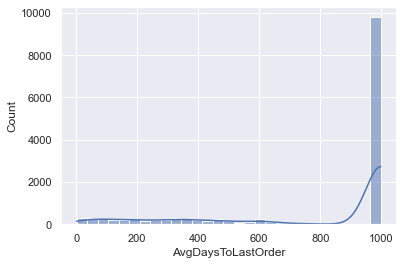

In [76]:
sns.histplot(last_order["AvgDaysToLastOrder"], kde=True) 

# RFM plus demographic data

In [77]:
data_start

,OrderDate,OrderNumber,ProductKey,OrderQuantity,ProductPrice,OrderValue,CustomerKey,difference
0,2015-01-01,SO45080,332,1,699.0982,699.0982,14657,818
1,2015-01-01,SO45079,312,1,3578.2700,3578.2700,29255,818
2,2015-01-01,SO45082,350,1,3374.9900,3374.9900,11455,818
3,2015-01-01,SO45081,338,1,699.0982,699.0982,26782,818
4,2015-01-02,SO45083,312,1,3578.2700,3578.2700,14947,817
...,...,...,...,...,...,...,...,...
39921,2017-03-29,SO67120,529,2,3.9900,7.9800,24156,0
39922,2017-03-29,SO67138,220,1,33.6442,33.6442,24197,0
39923,2017-03-29,SO67138,389,1,1000.4375,1000.4375,24197,0
39924,2017-03-29,SO67132,383,1,1000.4375,1000.4375,25960,0


In [78]:
RFM

,Recency,Frequency,Monetary
CustomerKey,,,
19126,0,1,69.99
16598,0,4,6894.50
12028,0,2,44.98
17971,0,2,1734.63
13116,0,5,81.52
...,...,...,...
29151,815,1,3578.27
25977,816,1,3374.99
29170,816,1,3578.27


In [79]:
purchase_dates

,CustomerKey,LastPurchase,NextPurchase,DaysToNextPurchase,NextPurchaseClass
0,11000,2016-11-04,NaT,999.0,0
1,11001,2016-07-20,2017-06-12,74.0,1
2,11002,2016-08-27,NaT,999.0,0
3,11003,2016-11-11,NaT,999.0,0
4,11004,2016-11-02,NaT,999.0,0
...,...,...,...,...,...
13753,29479,2016-03-08,NaT,999.0,0
13754,29480,2017-01-18,NaT,999.0,0
13755,29481,2015-02-13,NaT,999.0,0
13756,29482,2016-03-22,NaT,999.0,0


In [80]:
date_cust

,OrderDate,CustomerKey,LastOrder,2ndLastOrder,3rdLastOrder,DaysToLastOrder,DaysTo2ndLastOrder,DaysTo3rdLastOrder
0,2015-01-01,14657,NaT,NaT,NaT,NaN,NaN,NaN
1,2015-01-01,29255,NaT,NaT,NaT,NaN,NaN,NaN
2,2015-01-01,11455,NaT,NaT,NaT,NaN,NaN,NaN
3,2015-01-01,26782,NaT,NaT,NaT,NaN,NaN,NaN
4,2015-01-02,14947,NaT,NaT,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
39917,2017-03-29,27724,NaT,NaT,NaT,NaN,NaN,NaN
39918,2017-03-29,13116,2016-09-15,NaT,NaT,195.0,195.0,NaN
39920,2017-03-29,24156,NaT,NaT,NaT,NaN,NaN,NaN
39922,2017-03-29,24197,NaT,NaT,NaT,NaN,NaN,NaN


In [81]:
date_cust.columns

Index(['OrderDate', 'CustomerKey', 'LastOrder', '2ndLastOrder', '3rdLastOrder',
       'DaysToLastOrder', 'DaysTo2ndLastOrder', 'DaysTo3rdLastOrder'],
      dtype='object')

In [82]:
RFM.reset_index(inplace=True)

In [83]:
RFM

,CustomerKey,Recency,Frequency,Monetary
0,19126,0,1,69.99
1,16598,0,4,6894.50
2,12028,0,2,44.98
3,17971,0,2,1734.63
4,13116,0,5,81.52
...,...,...,...,...
13753,29151,815,1,3578.27
13754,25977,816,1,3374.99
13755,29170,816,1,3578.27
13756,29143,817,1,3578.27


In [84]:
RFMplus = pd.merge(RFM,
                   date_cust[[ 'CustomerKey',
                       'LastOrder', '2ndLastOrder', '3rdLastOrder',
                       'DaysToLastOrder', 'DaysTo2ndLastOrder',
                       'DaysTo3rdLastOrder']],
                   on="CustomerKey")

In [85]:
RFMplus

,CustomerKey,Recency,Frequency,Monetary,LastOrder,2ndLastOrder,3rdLastOrder,DaysToLastOrder,DaysTo2ndLastOrder,DaysTo3rdLastOrder
0,19126,0,1,69.99,NaT,NaT,NaT,NaN,NaN,NaN
1,16598,0,4,6894.50,NaT,NaT,NaT,NaN,NaN,NaN
2,16598,0,4,6894.50,2015-11-24,NaT,NaT,457.0,457.0,NaN
3,16598,0,4,6894.50,2017-02-23,2015-11-24,NaT,34.0,34.0,491.0
4,12028,0,2,44.98,NaT,NaT,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
18705,29151,815,1,3578.27,NaT,NaT,NaT,NaN,NaN,NaN
18706,25977,816,1,3374.99,NaT,NaT,NaT,NaN,NaN,NaN
18707,29170,816,1,3578.27,NaT,NaT,NaT,NaN,NaN,NaN
18708,29143,817,1,3578.27,NaT,NaT,NaT,NaN,NaN,NaN


In [86]:
RFMplus = pd.merge(RFMplus,
                   purchase_dates[["CustomerKey", "NextPurchaseClass"]],
                   on="CustomerKey")

In [87]:
RFMplus

,CustomerKey,Recency,Frequency,Monetary,LastOrder,2ndLastOrder,3rdLastOrder,DaysToLastOrder,DaysTo2ndLastOrder,DaysTo3rdLastOrder,NextPurchaseClass
0,19126,0,1,69.99,NaT,NaT,NaT,NaN,NaN,NaN,0
1,16598,0,4,6894.50,NaT,NaT,NaT,NaN,NaN,NaN,0
2,16598,0,4,6894.50,2015-11-24,NaT,NaT,457.0,457.0,NaN,0
3,16598,0,4,6894.50,2017-02-23,2015-11-24,NaT,34.0,34.0,491.0,0
4,12028,0,2,44.98,NaT,NaT,NaT,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
18705,29151,815,1,3578.27,NaT,NaT,NaT,NaN,NaN,NaN,0
18706,25977,816,1,3374.99,NaT,NaT,NaT,NaN,NaN,NaN,2
18707,29170,816,1,3578.27,NaT,NaT,NaT,NaN,NaN,NaN,0
18708,29143,817,1,3578.27,NaT,NaT,NaT,NaN,NaN,NaN,0


In [88]:
RFMplus.duplicated().sum()

0

In [89]:
RFMplus.isnull().sum()

CustomerKey               0
Recency                   0
Frequency                 0
Monetary                  0
LastOrder             13758
2ndLastOrder          17714
3rdLastOrder          18302
DaysToLastOrder       13758
DaysTo2ndLastOrder    13758
DaysTo3rdLastOrder    17714
NextPurchaseClass         0
dtype: int64

In [90]:
RFMplus.shape

(18710, 11)

In [91]:
cust_scaled

,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,Country_Australia,Country_Canada,Country_France,Country_Germany,Country_United Kingdom,Country_United States,Age,YearlyIncome,CustomerID
0,4,4,0,0,1,0,0,2,1,0,0,0,0,0,0.306122,0.686872,11000
1,4,4,0,1,0,1,3,3,1,0,0,0,0,0,0.326531,0.490079,11001
2,4,4,0,0,1,1,3,3,1,0,0,0,0,0,0.306122,0.440910,11002
3,4,4,1,1,0,1,0,0,1,0,0,0,0,0,0.265306,0.412802,11003
4,4,4,1,1,1,4,5,5,1,0,0,0,0,0,0.244898,0.445327,11004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16832,5,3,1,1,0,0,0,0,0,0,0,0,1,0,0.244898,0.468387,24211
16833,3,5,1,1,0,4,4,4,0,0,0,1,0,0,0.632653,0.541520,23627
16834,4,5,1,1,0,4,3,3,0,0,0,0,0,1,0.877551,0.687674,14500
16835,3,4,1,0,1,1,0,2,0,0,0,0,0,1,0.489796,0.491811,22223


In [92]:
RFMplus.rename(columns={"CustomerKey":"CustomerID"}, inplace=True)
RFMplus

,CustomerID,Recency,Frequency,Monetary,LastOrder,2ndLastOrder,3rdLastOrder,DaysToLastOrder,DaysTo2ndLastOrder,DaysTo3rdLastOrder,NextPurchaseClass
0,19126,0,1,69.99,NaT,NaT,NaT,NaN,NaN,NaN,0
1,16598,0,4,6894.50,NaT,NaT,NaT,NaN,NaN,NaN,0
2,16598,0,4,6894.50,2015-11-24,NaT,NaT,457.0,457.0,NaN,0
3,16598,0,4,6894.50,2017-02-23,2015-11-24,NaT,34.0,34.0,491.0,0
4,12028,0,2,44.98,NaT,NaT,NaT,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
18705,29151,815,1,3578.27,NaT,NaT,NaT,NaN,NaN,NaN,0
18706,25977,816,1,3374.99,NaT,NaT,NaT,NaN,NaN,NaN,2
18707,29170,816,1,3578.27,NaT,NaT,NaT,NaN,NaN,NaN,0
18708,29143,817,1,3578.27,NaT,NaT,NaT,NaN,NaN,NaN,0


In [93]:
cust_scaled.columns

Index(['Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'Country_Australia', 'Country_Canada', 'Country_France',
       'Country_Germany', 'Country_United Kingdom', 'Country_United States',
       'Age', 'YearlyIncome', 'CustomerID'],
      dtype='object')

In [94]:
RFMall = pd.merge(RFMplus, cust_scaled, on= 'CustomerID')
RFMall

,CustomerID,Recency,Frequency,Monetary,LastOrder,2ndLastOrder,3rdLastOrder,DaysToLastOrder,DaysTo2ndLastOrder,DaysTo3rdLastOrder,...,NumberChildrenAtHome,TotalChildren,Country_Australia,Country_Canada,Country_France,Country_Germany,Country_United Kingdom,Country_United States,Age,YearlyIncome
0,16598,0,4,6894.50,NaT,NaT,NaT,NaN,NaN,NaN,...,5,5,0,0,0,0,1,0,0.591837,0.649819
1,16598,0,4,6894.50,2015-11-24,NaT,NaT,457.0,457.0,NaN,...,5,5,0,0,0,0,1,0,0.591837,0.649819
2,16598,0,4,6894.50,2017-02-23,2015-11-24,NaT,34.0,34.0,491.0,...,5,5,0,0,0,0,1,0,0.591837,0.649819
3,12028,0,2,44.98,NaT,NaT,NaT,NaN,NaN,NaN,...,0,0,0,0,0,0,0,1,0.061224,0.165424
4,13116,0,5,81.52,NaT,NaT,NaT,NaN,NaN,NaN,...,0,0,1,0,0,0,0,0,0.306122,0.916660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17085,29151,815,1,3578.27,NaT,NaT,NaT,NaN,NaN,NaN,...,0,1,0,0,0,0,0,1,0.408163,0.251683
17086,25977,816,1,3374.99,NaT,NaT,NaT,NaN,NaN,NaN,...,2,2,0,0,0,0,0,1,0.265306,0.513835
17087,29170,816,1,3578.27,NaT,NaT,NaT,NaN,NaN,NaN,...,0,1,0,0,0,0,0,1,0.448980,0.371942
17088,29143,817,1,3578.27,NaT,NaT,NaT,NaN,NaN,NaN,...,0,1,0,0,0,0,0,1,0.387755,0.410102


In [95]:
RFMall.columns

Index(['CustomerID', 'Recency', 'Frequency', 'Monetary', 'LastOrder',
       '2ndLastOrder', '3rdLastOrder', 'DaysToLastOrder', 'DaysTo2ndLastOrder',
       'DaysTo3rdLastOrder', 'NextPurchaseClass', 'Education', 'Occupation',
       'Gender', 'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned',
       'NumberChildrenAtHome', 'TotalChildren', 'Country_Australia',
       'Country_Canada', 'Country_France', 'Country_Germany',
       'Country_United Kingdom', 'Country_United States', 'Age',
       'YearlyIncome'],
      dtype='object')

In [96]:
RFMfinal = RFMall.drop(['LastOrder',
       '2ndLastOrder', '3rdLastOrder','DaysTo2ndLastOrder',
       'DaysTo3rdLastOrder','DaysToLastOrder'], axis=1)
RFMfinal

,CustomerID,Recency,Frequency,Monetary,NextPurchaseClass,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,...,NumberChildrenAtHome,TotalChildren,Country_Australia,Country_Canada,Country_France,Country_Germany,Country_United Kingdom,Country_United States,Age,YearlyIncome
0,16598,0,4,6894.50,0,2,4,1,1,0,...,5,5,0,0,0,0,1,0,0.591837,0.649819
1,16598,0,4,6894.50,0,2,4,1,1,0,...,5,5,0,0,0,0,1,0,0.591837,0.649819
2,16598,0,4,6894.50,0,2,4,1,1,0,...,5,5,0,0,0,0,1,0,0.591837,0.649819
3,12028,0,2,44.98,0,1,2,1,1,0,...,0,0,0,0,0,0,0,1,0.061224,0.165424
4,13116,0,5,81.52,1,5,5,0,1,0,...,0,0,1,0,0,0,0,0,0.306122,0.916660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17085,29151,815,1,3578.27,0,3,3,1,0,1,...,0,1,0,0,0,0,0,1,0.408163,0.251683
17086,25977,816,1,3374.99,2,5,4,1,0,1,...,2,2,0,0,0,0,0,1,0.265306,0.513835
17087,29170,816,1,3578.27,0,4,4,1,1,0,...,0,1,0,0,0,0,0,1,0.448980,0.371942
17088,29143,817,1,3578.27,0,4,4,1,1,0,...,0,1,0,0,0,0,0,1,0.387755,0.410102


# Feature engineering

## Transformation

<AxesSubplot:xlabel='Recency', ylabel='Count'>

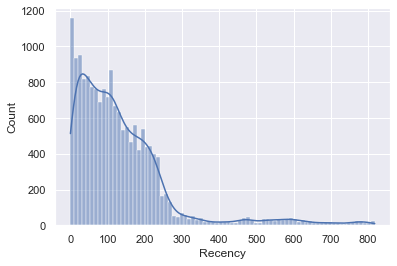

In [97]:
sns.histplot(RFMfinal["Recency"], kde=True)

<AxesSubplot:xlabel='Frequency', ylabel='Count'>

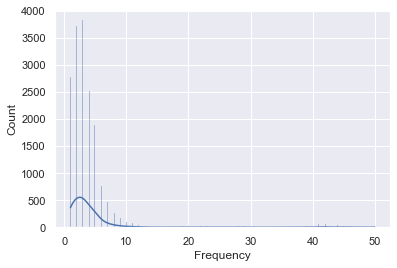

In [98]:
sns.histplot(RFMfinal["Frequency"], kde=True)

<AxesSubplot:xlabel='Monetary', ylabel='Count'>

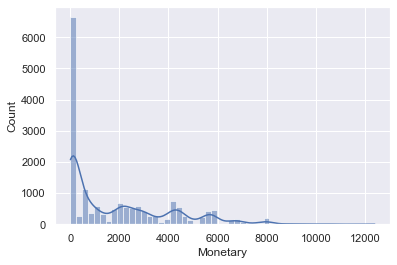

In [99]:
sns.histplot(RFMfinal["Monetary"], kde=True)

In [100]:
RFMclean = RFMfinal[["Recency", "Frequency", "Monetary"]].apply(np.log1p, axis=1).round(2)
RFMclean

,Recency,Frequency,Monetary
0,0.00,1.61,8.84
1,0.00,1.61,8.84
2,0.00,1.61,8.84
3,0.00,1.10,3.83
4,0.00,1.79,4.41
...,...,...,...
17085,6.70,0.69,8.18
17086,6.71,0.69,8.12
17087,6.71,0.69,8.18
17088,6.71,0.69,8.18


<AxesSubplot:xlabel='Recency', ylabel='Count'>

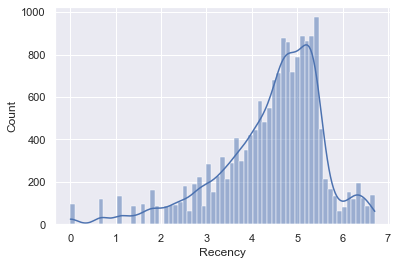

In [101]:
sns.histplot(RFMclean["Recency"], kde=True)

<AxesSubplot:xlabel='Frequency', ylabel='Count'>

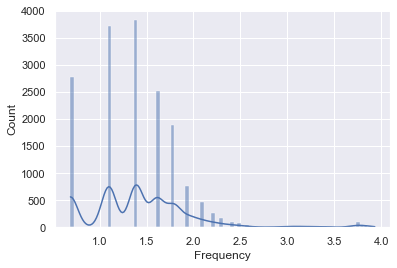

In [102]:
sns.histplot(RFMclean["Frequency"], kde=True)

<AxesSubplot:xlabel='Monetary', ylabel='Count'>

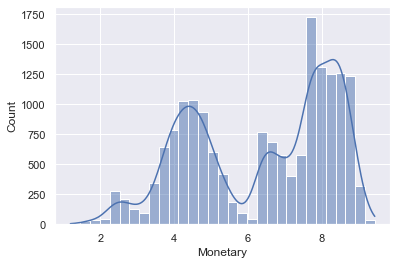

In [103]:
sns.histplot(RFMclean["Monetary"], kde=True)

## Scaling

In [104]:
#initialise the scaler
mmscaler = MinMaxScaler()

In [105]:
RFMscaled = mmscaler.fit_transform(RFMclean)
RFMscaled = pd.DataFrame(RFMscaled)
RFMscaled.columns = ["Recency_scaled", "Frequency_scaled", "Monetary_scaled"]
RFMscaled

,Recency_scaled,Frequency_scaled,Monetary_scaled
0,0.00000,0.283951,0.928398
1,0.00000,0.283951,0.928398
2,0.00000,0.283951,0.928398
3,0.00000,0.126543,0.320388
4,0.00000,0.339506,0.390777
...,...,...,...
17085,0.99851,0.000000,0.848301
17086,1.00000,0.000000,0.841019
17087,1.00000,0.000000,0.848301
17088,1.00000,0.000000,0.848301


In [106]:
RFMfinal = pd.concat([RFMfinal, RFMscaled], axis=1)
RFMfinal

,CustomerID,Recency,Frequency,Monetary,NextPurchaseClass,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,...,Country_Canada,Country_France,Country_Germany,Country_United Kingdom,Country_United States,Age,YearlyIncome,Recency_scaled,Frequency_scaled,Monetary_scaled
0,16598,0,4,6894.50,0,2,4,1,1,0,...,0,0,0,1,0,0.591837,0.649819,0.00000,0.283951,0.928398
1,16598,0,4,6894.50,0,2,4,1,1,0,...,0,0,0,1,0,0.591837,0.649819,0.00000,0.283951,0.928398
2,16598,0,4,6894.50,0,2,4,1,1,0,...,0,0,0,1,0,0.591837,0.649819,0.00000,0.283951,0.928398
3,12028,0,2,44.98,0,1,2,1,1,0,...,0,0,0,0,1,0.061224,0.165424,0.00000,0.126543,0.320388
4,13116,0,5,81.52,1,5,5,0,1,0,...,0,0,0,0,0,0.306122,0.916660,0.00000,0.339506,0.390777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17085,29151,815,1,3578.27,0,3,3,1,0,1,...,0,0,0,0,1,0.408163,0.251683,0.99851,0.000000,0.848301
17086,25977,816,1,3374.99,2,5,4,1,0,1,...,0,0,0,0,1,0.265306,0.513835,1.00000,0.000000,0.841019
17087,29170,816,1,3578.27,0,4,4,1,1,0,...,0,0,0,0,1,0.448980,0.371942,1.00000,0.000000,0.848301
17088,29143,817,1,3578.27,0,4,4,1,1,0,...,0,0,0,0,1,0.387755,0.410102,1.00000,0.000000,0.848301


In [107]:
RFMfinal.drop(["Recency", "Frequency", "Monetary"], axis=1, inplace=True)
RFMfinal

,CustomerID,NextPurchaseClass,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,...,Country_Canada,Country_France,Country_Germany,Country_United Kingdom,Country_United States,Age,YearlyIncome,Recency_scaled,Frequency_scaled,Monetary_scaled
0,16598,0,2,4,1,1,0,3,5,5,...,0,0,0,1,0,0.591837,0.649819,0.00000,0.283951,0.928398
1,16598,0,2,4,1,1,0,3,5,5,...,0,0,0,1,0,0.591837,0.649819,0.00000,0.283951,0.928398
2,16598,0,2,4,1,1,0,3,5,5,...,0,0,0,1,0,0.591837,0.649819,0.00000,0.283951,0.928398
3,12028,0,1,2,1,1,0,2,0,0,...,0,0,0,0,1,0.061224,0.165424,0.00000,0.126543,0.320388
4,13116,1,5,5,0,1,0,2,0,0,...,0,0,0,0,0,0.306122,0.916660,0.00000,0.339506,0.390777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17085,29151,0,3,3,1,0,1,1,0,1,...,0,0,0,0,1,0.408163,0.251683,0.99851,0.000000,0.848301
17086,25977,2,5,4,1,0,1,0,2,2,...,0,0,0,0,1,0.265306,0.513835,1.00000,0.000000,0.841019
17087,29170,0,4,4,1,1,0,1,0,1,...,0,0,0,0,1,0.448980,0.371942,1.00000,0.000000,0.848301
17088,29143,0,4,4,1,1,0,1,0,1,...,0,0,0,0,1,0.387755,0.410102,1.00000,0.000000,0.848301


# Next Purchase Class Prediction

In [108]:
RFMfinal.corr()

,CustomerID,NextPurchaseClass,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,...,Country_Canada,Country_France,Country_Germany,Country_United Kingdom,Country_United States,Age,YearlyIncome,Recency_scaled,Frequency_scaled,Monetary_scaled
CustomerID,1.000000,-0.265718,-0.074929,-0.057725,-0.009686,0.068706,-0.128784,-0.008137,-0.051608,-0.036038,...,-0.088451,-0.009838,0.010404,-0.024590,0.050646,-0.024300,-0.081808,0.186337,-0.427403,-0.194973
NextPurchaseClass,-0.265718,1.000000,0.023803,0.054222,0.011808,-0.031239,0.027168,0.002745,0.051340,0.019123,...,0.265487,-0.014249,-0.012091,-0.005699,-0.209506,0.002534,0.055670,0.022335,0.159647,0.084010
Education,-0.074929,0.023803,1.000000,0.367894,0.010248,-0.096810,0.137119,-0.353159,-0.119498,-0.073901,...,0.010689,-0.112457,-0.065960,-0.032477,0.118345,0.025203,0.376916,-0.016489,0.044562,0.110880
Occupation,-0.057725,0.054222,0.367894,1.000000,0.011545,-0.148958,0.079408,0.390286,0.271683,0.395875,...,0.091158,-0.272522,-0.228829,-0.241499,0.259614,0.316882,0.796965,-0.060559,0.115946,0.048921
Gender,-0.009686,0.011808,0.010248,0.011545,1.000000,0.057719,0.006956,0.000708,-0.002113,-0.007597,...,-0.013586,-0.008963,-0.003188,0.002080,0.009456,-0.002857,-0.172888,0.015907,-0.007531,0.015987
MaritalStatus,0.068706,-0.031239,-0.096810,-0.148958,0.057719,1.000000,-0.318364,-0.022395,-0.106851,-0.191068,...,-0.044887,0.027904,0.022722,-0.015436,-0.029419,-0.199332,-0.123972,0.039403,-0.050941,0.056260
HomeOwnerFlag,-0.128784,0.027168,0.137119,0.079408,0.006956,-0.318364,1.000000,-0.075676,0.133724,0.193581,...,0.013300,0.011256,0.003076,0.004128,0.042258,0.131780,0.060074,-0.028520,0.056895,0.024744
NumberCarsOwned,-0.008137,0.002745,-0.353159,0.390286,0.000708,-0.022395,-0.075676,1.000000,0.452164,0.409489,...,-0.037803,-0.081299,-0.071207,-0.091270,0.008113,0.187353,0.370363,-0.028204,0.018545,-0.093883
NumberChildrenAtHome,-0.051608,0.051340,-0.119498,0.271683,-0.002113,-0.106851,0.133724,0.452164,1.000000,0.683483,...,-0.000780,-0.030068,0.053769,0.080310,-0.111066,0.021817,0.389013,-0.064294,0.101620,-0.025523
TotalChildren,-0.036038,0.019123,-0.073901,0.395875,-0.007597,-0.191068,0.193581,0.409489,0.683483,1.000000,...,0.030399,-0.035133,-0.010822,-0.015985,0.037975,0.479720,0.373846,-0.047920,0.083254,-0.049799


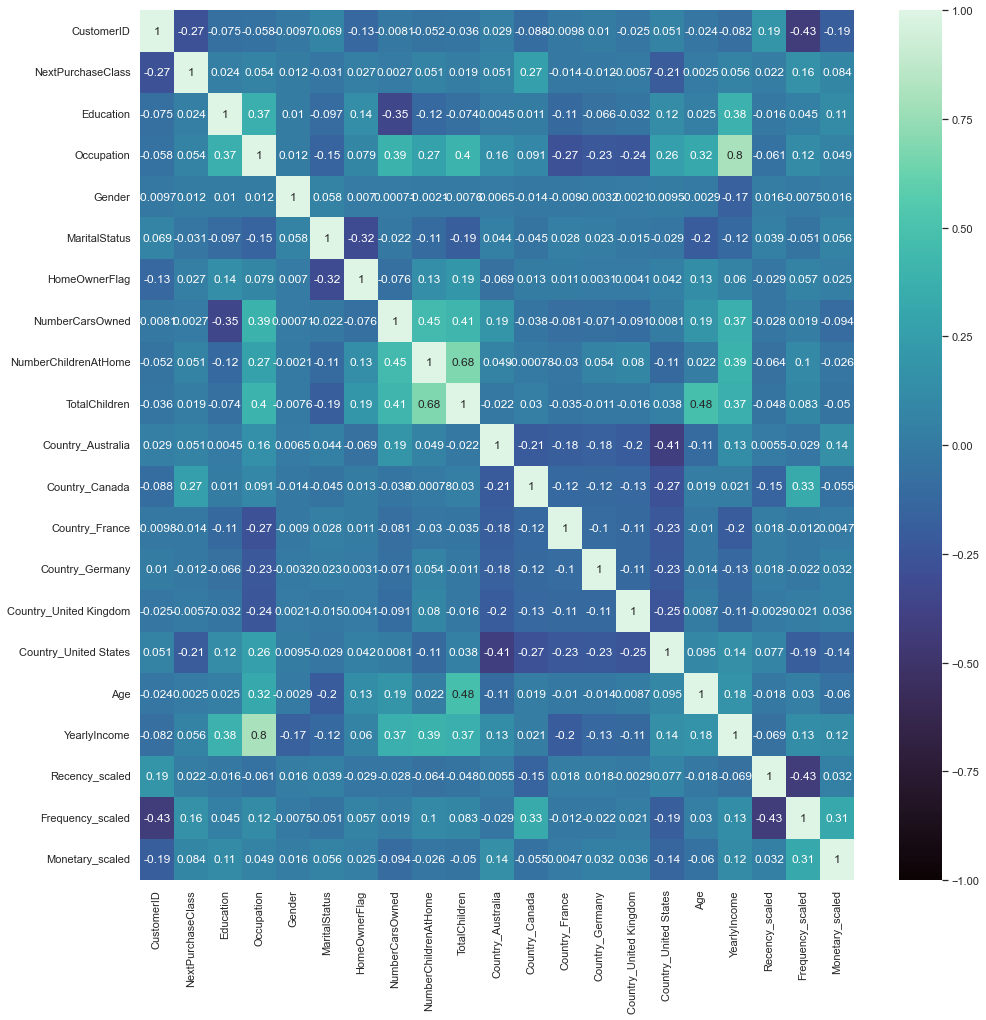

In [109]:
plt.figure(figsize=(16,16))
sns.heatmap(RFMfinal.corr(),
           xticklabels = RFMfinal.columns.values,
           yticklabels = RFMfinal.columns.values,
           annot = True, vmax=1, vmin=-1, center=0,  cmap = 'mako')

plt.show()

In [110]:
# first split target and features

X = RFMfinal.drop(["CustomerID", "NextPurchaseClass"], axis=1)
y = RFMfinal["NextPurchaseClass"]

In [111]:
X

,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,Country_Australia,Country_Canada,Country_France,Country_Germany,Country_United Kingdom,Country_United States,Age,YearlyIncome,Recency_scaled,Frequency_scaled,Monetary_scaled
0,2,4,1,1,0,3,5,5,0,0,0,0,1,0,0.591837,0.649819,0.00000,0.283951,0.928398
1,2,4,1,1,0,3,5,5,0,0,0,0,1,0,0.591837,0.649819,0.00000,0.283951,0.928398
2,2,4,1,1,0,3,5,5,0,0,0,0,1,0,0.591837,0.649819,0.00000,0.283951,0.928398
3,1,2,1,1,0,2,0,0,0,0,0,0,0,1,0.061224,0.165424,0.00000,0.126543,0.320388
4,5,5,0,1,0,2,0,0,1,0,0,0,0,0,0.306122,0.916660,0.00000,0.339506,0.390777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17085,3,3,1,0,1,1,0,1,0,0,0,0,0,1,0.408163,0.251683,0.99851,0.000000,0.848301
17086,5,4,1,0,1,0,2,2,0,0,0,0,0,1,0.265306,0.513835,1.00000,0.000000,0.841019
17087,4,4,1,1,0,1,0,1,0,0,0,0,0,1,0.448980,0.371942,1.00000,0.000000,0.848301
17088,4,4,1,1,0,1,0,1,0,0,0,0,0,1,0.387755,0.410102,1.00000,0.000000,0.848301


In [112]:
y

0        0
1        0
2        0
3        0
4        1
        ..
17085    0
17086    2
17087    0
17088    0
17089    0
Name: NextPurchaseClass, Length: 17090, dtype: int64

In [113]:
#split the data

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=66)

## Logistic regression

In [114]:
#start and train the model

logreg = LogisticRegression(random_state=66)

logreg.fit(Xtrain, ytrain)

LogisticRegression(random_state=66)

In [115]:
#make next purchase class predictions
ypred = logreg.predict(Xtest)

In [116]:
ypred

array([2, 0, 0, ..., 0, 0, 0], dtype=int64)

In [117]:
# make fucntions for evaluation

def C_metrics_train(model, X_train, y_train):
    scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_macro': 'recall_macro',
           'f1_macro': 'f1_macro'}
    
    scores = cross_validate(model, X_train, y_train, cv=10, scoring=scoring)
    ypredTrain = model.predict(X_train)
    Acc_train = scores['test_acc'].mean()
    Precision_train = scores['test_prec_macro'].mean()
    Recall_train = scores['test_rec_macro'].mean()
    F1_train = scores['test_f1_macro'].mean()
    conf_matrix_train = confusion_matrix(y_train, ypredTrain)
    from sklearn.metrics import classification_report
    statist_train = []
   
    list_metrics = [Acc_train, Precision_train, Recall_train, F1_train]
    statist_train.append(list_metrics)
    statist_train = pd.DataFrame(statist_train,columns = ['Accuracy', 'Precision', 'Recall', 'f1'], index = ['Train'])
    
    print('-')
    print('TRAIN results')
    print('-')
    print('Confusion Matrix \n', conf_matrix_train)
    return statist_train

In [118]:
def C_metrics_test(model, X_test, y_test):
    
    scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_macro': 'recall_macro',
           'f1_macro': 'f1_macro'}
    
    scores = cross_validate(model, X_test, y_test, cv=10, scoring=scoring)
    ypredtest = model.predict(X_test)
    report = classification_report(y_test, ypredtest,zero_division=0, output_dict=True)
    report = pd.DataFrame(report).T
    
    Acc_test = report.loc['accuracy', :].mean()  
    Rest_metrics = report.iloc[:-3,:]
    
    Precision_test = Rest_metrics.loc[:,'precision'].mean()
    Recall_test = Rest_metrics.loc[:,'recall'].mean()
    F1_test = Rest_metrics.loc[:,'f1-score'].mean()
    conf_matrix_test = confusion_matrix(y_test, ypredtest)
    
    statist_test = []
   
    list_metrics = [Acc_test, Precision_test, Recall_test, F1_test]
    statist_test.append(list_metrics)
    statist_test = pd.DataFrame(statist_test,columns = ['Accuracy', 'Precision', 'Recall', 'f1'], index = ['test'])
     
    print('-')
    print('TEST results')
    print('-')
    print('Confusion Matrix \n', conf_matrix_test)
    print(' Classification report \n', Rest_metrics)
    return statist_test

In [119]:
def C_Allmetrics(model,X_train,y_train,X_test,y_test):
    
    stats_train = C_metrics_train(model, X_train,y_train)
    stats_test = C_metrics_test(model, X_test,y_test)
    final_metrics = pd.concat([stats_train,stats_test])
    print()
    print('Summary of the Metrics')
    print(final_metrics)
    return final_metrics

In [120]:
#evaluate the model

C_Allmetrics(logreg,Xtrain,ytrain,Xtest,ytest)

-
TRAIN results
-
Confusion Matrix 
 [[9743   39    1]
 [1231   17   13]
 [ 794   11  114]]
-
TEST results
-
Confusion Matrix 
 [[4172    9    1]
 [ 504    7    8]
 [ 366    3   57]]
 Classification report 
    precision    recall  f1-score  support
0   0.827449  0.997609  0.904597   4182.0
1   0.368421  0.013487  0.026022    519.0
2   0.863636  0.133803  0.231707    426.0

Summary of the Metrics
       Accuracy  Precision    Recall        f1
Train  0.824124   0.657577  0.374407  0.376801
test   0.826214   0.686502  0.381633  0.387442


,Accuracy,Precision,Recall,f1
Train,0.824124,0.657577,0.374407,0.376801
test,0.826214,0.686502,0.381633,0.387442


## Random forest

In [121]:
#instantiate and train

rand_forest = RandomForestClassifier(n_estimators=100, random_state=66)

rand_forest.fit(Xtrain, ytrain)

RandomForestClassifier(random_state=66)

In [122]:
#predictions
ypred_rf = rand_forest.predict(Xtest)
ypred_rf

array([2, 0, 0, ..., 0, 0, 0], dtype=int64)

In [123]:
#evaluate

C_Allmetrics(rand_forest, Xtrain, ytrain, Xtest, ytest)

-
TRAIN results
-
Confusion Matrix 
 [[9783    0    0]
 [   0 1261    0]
 [   0    0  919]]
-
TEST results
-
Confusion Matrix 
 [[4158   17    7]
 [ 137  365   17]
 [ 102   44  280]]
 Classification report 
    precision    recall  f1-score  support
0   0.945645  0.994261  0.969344   4182.0
1   0.856808  0.703276  0.772487    519.0
2   0.921053  0.657277  0.767123    426.0

Summary of the Metrics
       Accuracy  Precision    Recall        f1
Train  0.930035   0.897400  0.761481  0.816715
test   0.936805   0.907835  0.784938  0.836318


,Accuracy,Precision,Recall,f1
Train,0.930035,0.897400,0.761481,0.816715
test,0.936805,0.907835,0.784938,0.836318


## visualise the results

In [124]:
ytest

5841     2
9841     0
6126     0
2801     0
12992    0
        ..
7059     0
5931     0
1889     0
4289     0
8        0
Name: NextPurchaseClass, Length: 5127, dtype: int64

In [125]:
ypred_rf

array([2, 0, 0, ..., 0, 0, 0], dtype=int64)

In [126]:
# creating a dataframe with real and predicted purchase classes

ytest = pd.DataFrame(ytest)
ypred_rf = pd.DataFrame(ypred_rf)

ytest.index = ypred_rf.index

assess = pd.concat([ytest, ypred_rf], axis=1)
assess

,NextPurchaseClass,0
0,2,2
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
5122,0,0
5123,0,0
5124,0,0
5125,0,0


In [127]:
assess.columns = ["RealNextPurchaseClass", "PredictedNextPurchaseClass"]
assess

,RealNextPurchaseClass,PredictedNextPurchaseClass
0,2,2
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
5122,0,0
5123,0,0
5124,0,0
5125,0,0


In [128]:
confusion_matrix(ytest, ypred_rf)

array([[4158,   17,    7],
       [ 137,  365,   17],
       [ 102,   44,  280]], dtype=int64)

In [129]:
confmatrix = pd.DataFrame(confusion_matrix(ytest, ypred_rf))

In [130]:
confmatrix.columns = ["No Purchases in 3m", "Purchase in the next month", "Purchase in the next 2m"]

In [131]:
confmatrix.index = ["No Purchases Predicted in 3m", "Predict purchase in the next month", "Predict purchase in the next 2m"]

In [132]:
confmatrix

,No Purchases in 3m,Purchase in the next month,Purchase in the next 2m
No Purchases Predicted in 3m,4158,17,7
Predict purchase in the next month,137,365,17
Predict purchase in the next 2m,102,44,280


<AxesSubplot:>

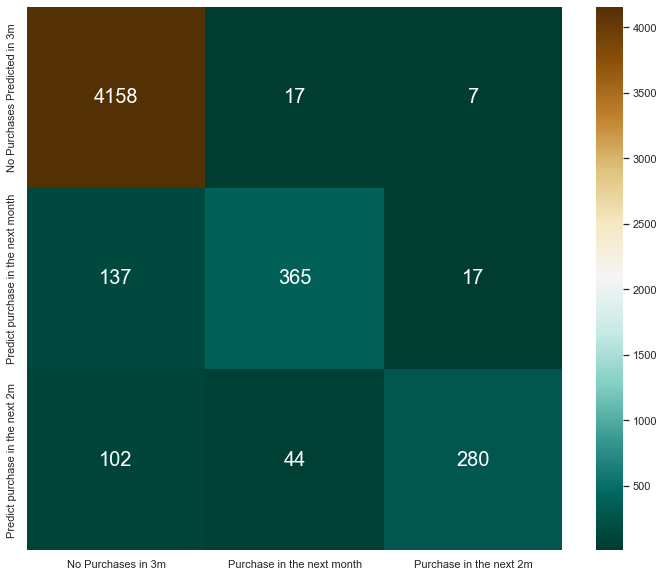

In [159]:
plt.figure(figsize=(12, 10))
sns.heatmap(confmatrix, annot=True, cmap="BrBG_r", fmt='g', annot_kws={"size":20})

In [134]:
4158+365+280

4803

In [135]:
4803/5127

0.9368051492100644